#Telugu Movies Rating Prediction
This notebook predicts Telugu movie ratings based on movie attributes such as Genre, Runtime, Year, and more.

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:

df = pd.read_csv("TeluguMovies_dataset.csv")
df.head()

,Unnamed: 0,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211


In [30]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1400 non-null   int64  
 1   Movie          1400 non-null   object 
 2   Year           1352 non-null   float64
 3   Certificate    951 non-null    object 
 4   Genre          1389 non-null   object 
 5   Overview       1221 non-null   object 
 6   Runtime        1400 non-null   int64  
 7   Rating         1400 non-null   float64
 8   No.of.Ratings  1400 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 98.6+ KB


,Unnamed: 0,Year,Runtime,Rating,No.of.Ratings
count,1400.0000,1352.000000,1400.000000,1400.000000,1400.000000
mean,699.5000,2005.013314,121.764286,6.317214,1214.755714
std,404.2895,13.148859,55.925792,1.314660,4328.073152
min,0.0000,1932.000000,0.000000,1.000000,49.000000
25%,349.7500,1997.000000,123.000000,5.500000,92.000000
50%,699.5000,2009.000000,141.000000,6.500000,255.500000
75%,1049.2500,2015.000000,154.000000,7.300000,829.000000
max,1399.0000,2020.000000,300.000000,9.500000,99114.000000


In [31]:

df = df.drop(columns=["Unnamed: 0", "Movie", "Overview"], errors="ignore")

df = df.dropna()

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,Year,Certificate,Genre,Runtime,Rating,No.of.Ratings
0,2015.0,5,25,159,8.1,99114
1,2017.0,5,25,167,8.2,71458
2,2014.0,5,45,170,8.1,42372
3,2013.0,5,45,172,5.4,42112
4,2011.0,3,7,156,4.6,37211


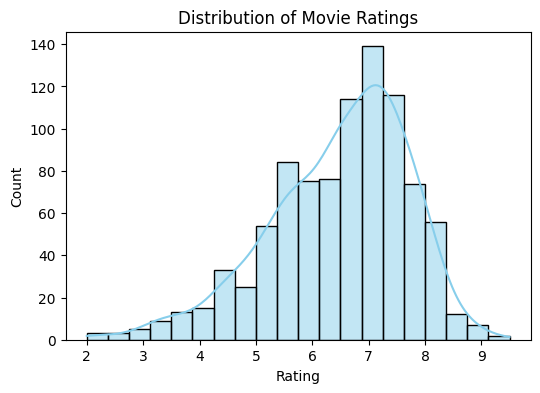

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.show()

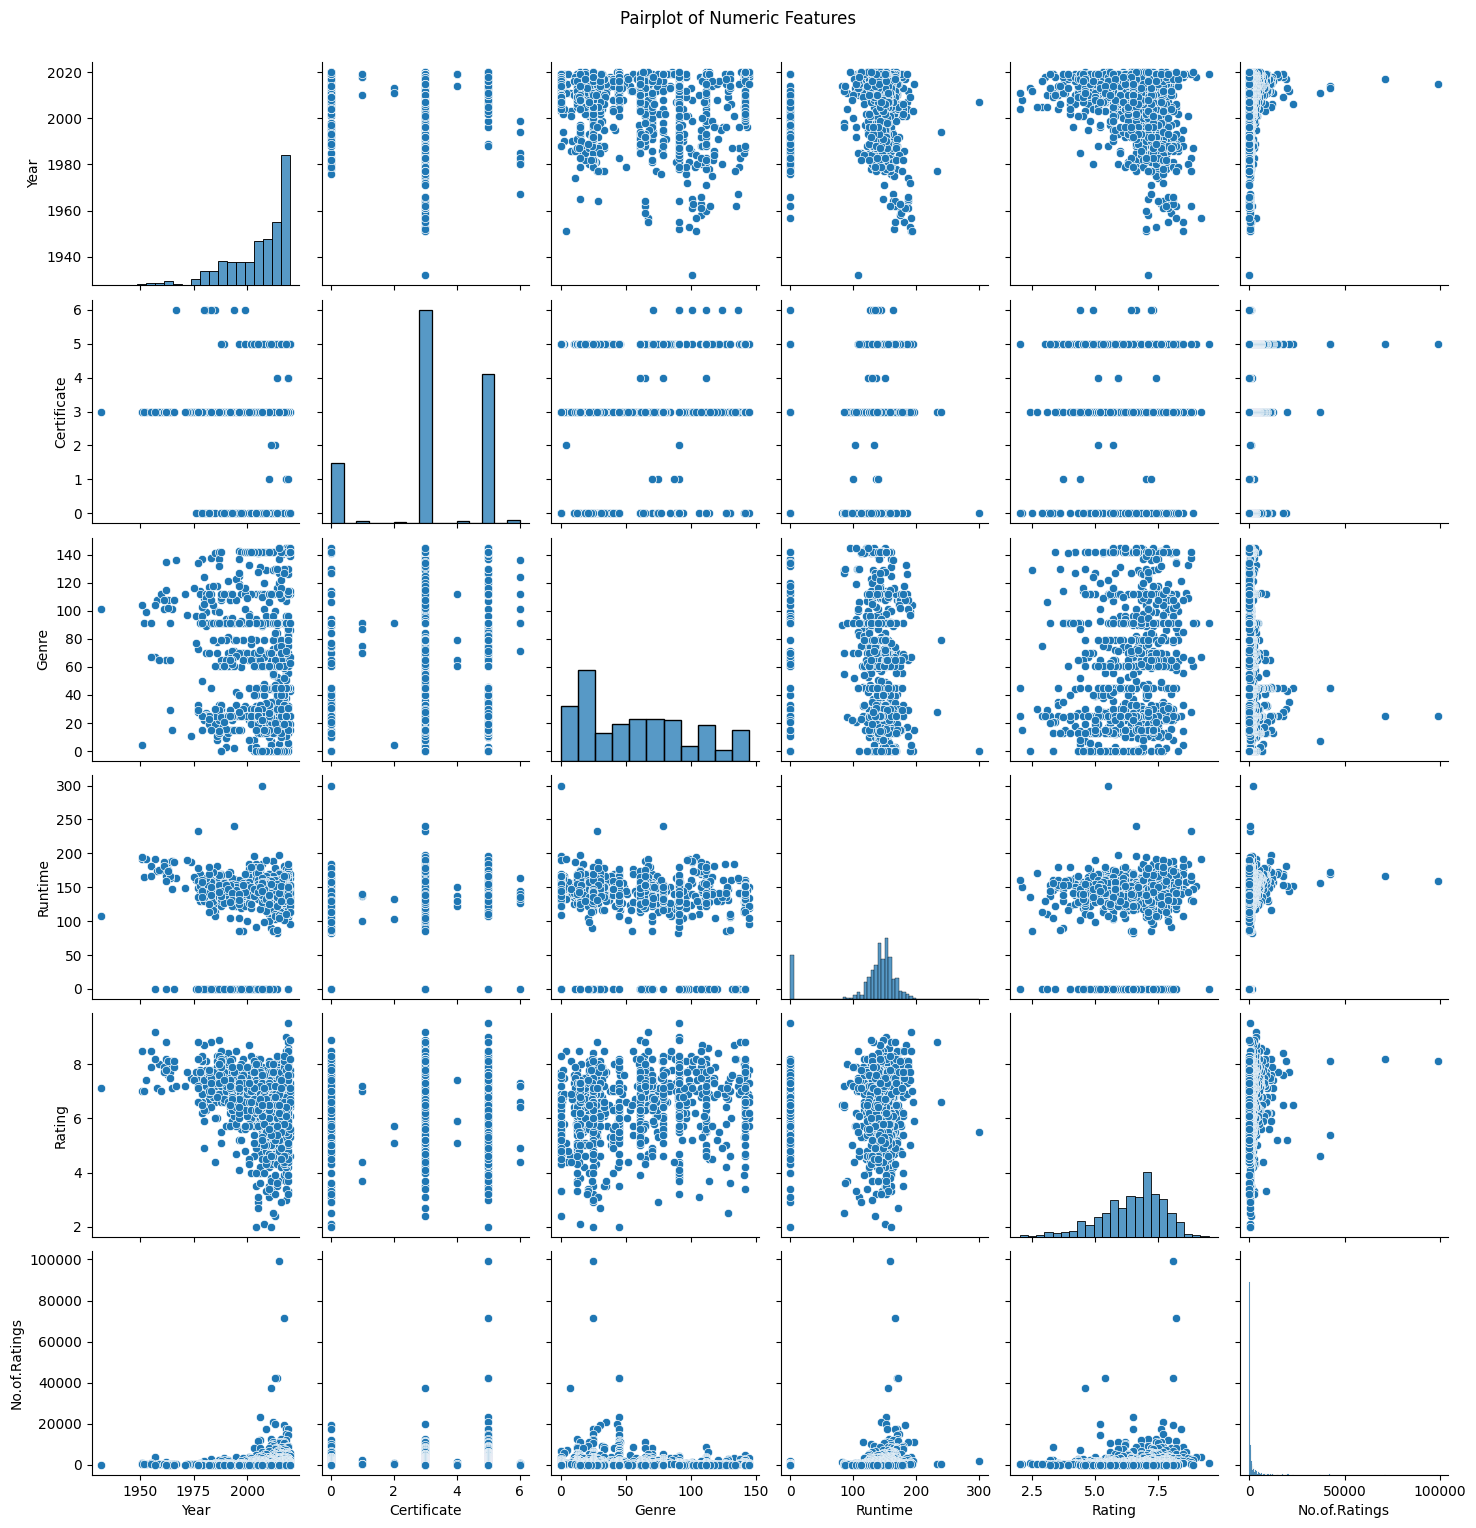

In [33]:
sns.pairplot(df.select_dtypes(include=['float64','int64']))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


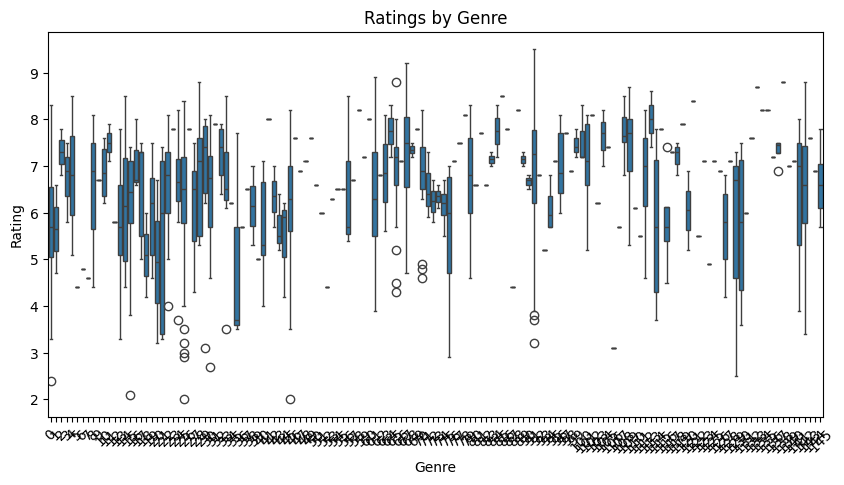

In [34]:
plt.figure(figsize=(10,5))
if 'Genre' in df.columns:
    sns.boxplot(x='Genre', y='Rating', data=df)
    plt.title("Ratings by Genre")
    plt.xticks(rotation=45)
    plt.show()

In [52]:
plt.figure(figsize=(8,4))
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
if 'Movie' in df.columns:
    sns.barplot(x='Rating', y='Movie', data=top_movies, palette='magma')
    plt.title("Top 10 Highest Rated Movies")
    plt.show()


<Figure size 800x400 with 0 Axes>

In [36]:
if 'Votes' in df.columns:
    sns.jointplot(x='Votes', y='Rating', data=df, kind='scatter', height=6, color='purple')
    plt.suptitle("Votes vs Rating", y=1.02)
    plt.show()


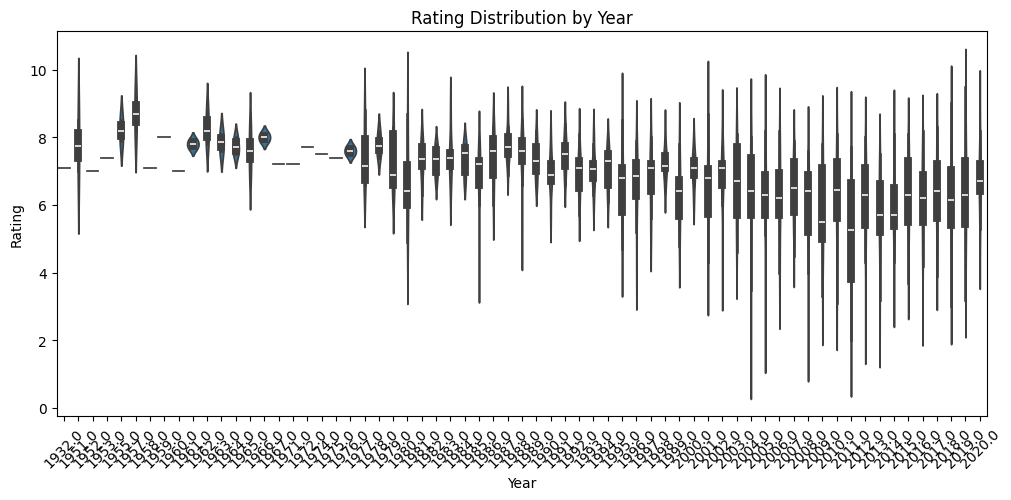

In [37]:
plt.figure(figsize=(12,5))
if 'Year' in df.columns:
    sns.violinplot(x='Year', y='Rating', data=df)
    plt.title("Rating Distribution by Year")
    plt.xticks(rotation=45)
    plt.show()


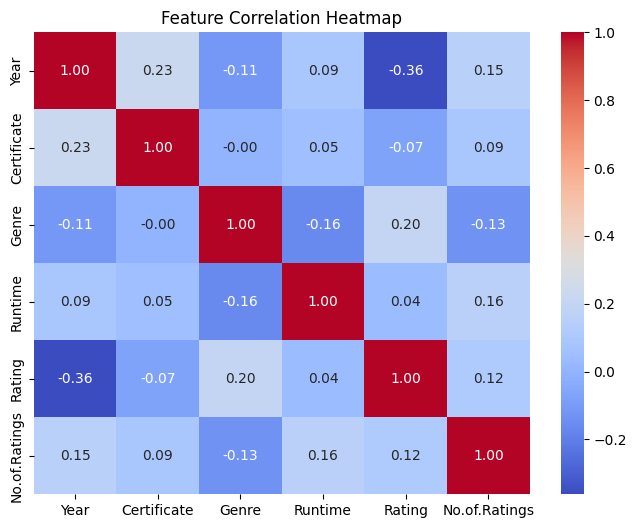

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [53]:
plt.figure(figsize=(6,4))
if 'Votes' in df.columns:
    sns.histplot(df['Votes'], bins=20, kde=True, color='lightgreen')
    plt.title("Distribution of Votes")
    plt.xlabel("Votes")
    plt.ylabel("Count")
    plt.show()


<Figure size 600x400 with 0 Axes>

In [40]:
plt.figure(figsize=(6,4))
if 'Revenue' in df.columns and 'Rating' in df.columns:
    sns.regplot(x='Revenue', y='Rating', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title("Revenue vs Rating")
    plt.xlabel("Revenue")
    plt.ylabel("Rating")
    plt.show()


<Figure size 600x400 with 0 Axes>

C:\Users\gitav\AppData\Local\Temp\ipykernel_21696\3067769174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')


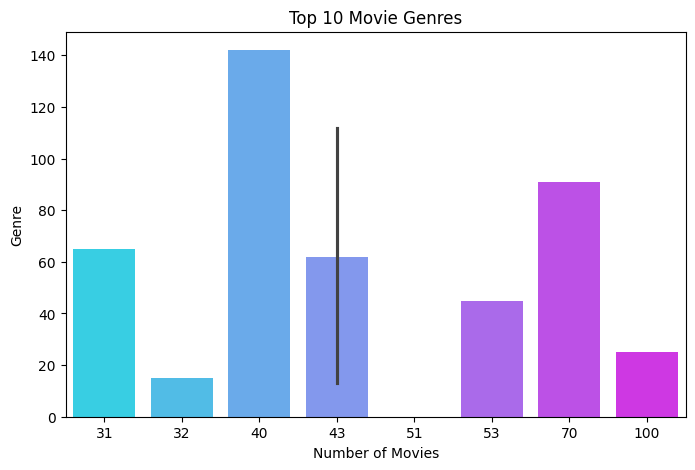

In [41]:
plt.figure(figsize=(8,5))
if 'Genre' in df.columns:
    top_genres = df['Genre'].value_counts().nlargest(10)
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')
    plt.title("Top 10 Movie Genres")
    plt.xlabel("Number of Movies")
    plt.ylabel("Genre")
    plt.show()


C:\Users\gitav\AppData\Local\Temp\ipykernel_21696\2643767294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')


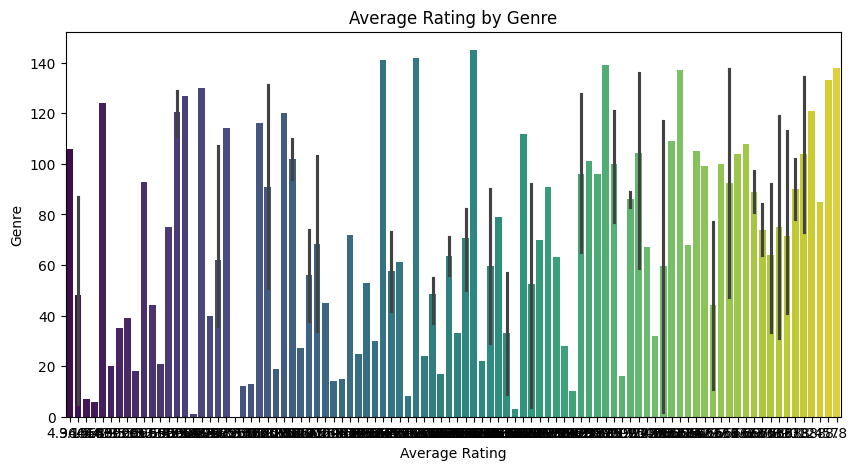

In [42]:
plt.figure(figsize=(10,5))
if 'Genre' in df.columns and 'Rating' in df.columns:
    genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
    sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')
    plt.title("Average Rating by Genre")
    plt.xlabel("Average Rating")
    plt.ylabel("Genre")
    plt.show()


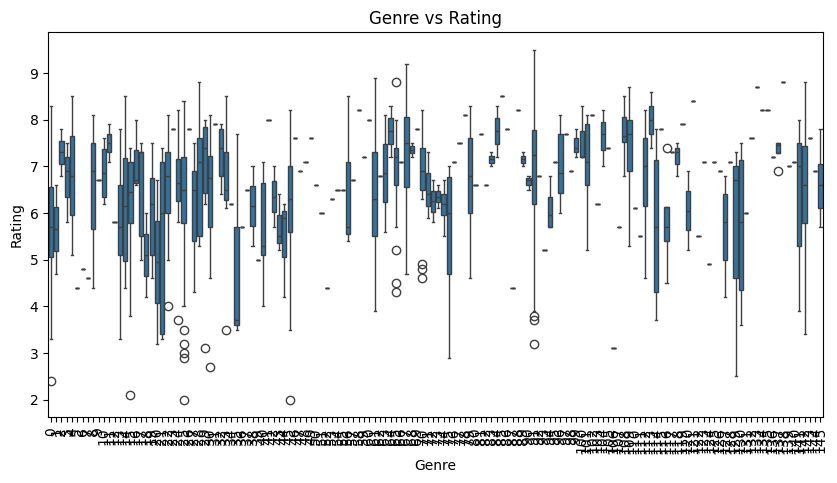

In [43]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Genre vs Rating')
plt.show()


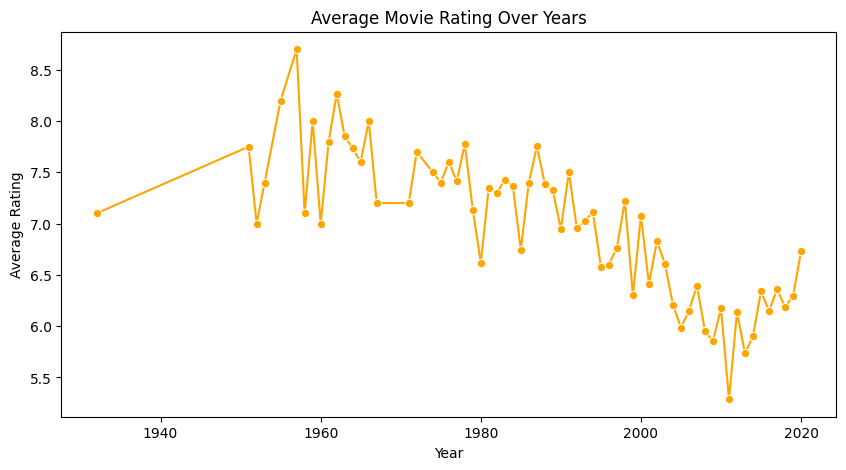

In [44]:
plt.figure(figsize=(10,5))
if 'Year' in df.columns and 'Rating' in df.columns:
    yearly_rating = df.groupby('Year')['Rating'].mean().reset_index()
    sns.lineplot(x='Year', y='Rating', data=yearly_rating, marker='o', color='orange')
    plt.title("Average Movie Rating Over Years")
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.show()


In [45]:
plt.figure(figsize=(8,5))
if 'Budget' in df.columns and 'Rating' in df.columns and 'Revenue' in df.columns:
    sns.scatterplot(x='Budget', y='Rating', size='Revenue', sizes=(20, 200), data=df, alpha=0.6, hue='Rating', palette='coolwarm')
    plt.title("Budget vs Rating (Bubble Size = Revenue)")
    plt.xlabel("Budget")
    plt.ylabel("Rating")
    plt.legend(title='Rating', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.show()


<Figure size 800x500 with 0 Axes>

In [46]:
plt.figure(figsize=(6,4))
if 'Revenue' in df.columns:
    sns.histplot(df['Revenue'], bins=20, kde=True, color='lightblue')
    plt.title("Distribution of Movie Revenue")
    plt.xlabel("Revenue")
    plt.ylabel("Count")
    plt.show()


<Figure size 600x400 with 0 Axes>

In [47]:
plt.figure(figsize=(6,4))
if 'Budget' in df.columns:
    sns.histplot(df['Budget'], bins=20, kde=True, color='salmon')
    plt.title("Distribution of Movie Budget")
    plt.xlabel("Budget")
    plt.ylabel("Count")
    plt.show()


<Figure size 600x400 with 0 Axes>

In [48]:

X = df.drop(columns=['Rating'])
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [50]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.9064633058176305
Mean Squared Error (MSE): 1.3584796476096035
R² Score: 0.1467513676472728


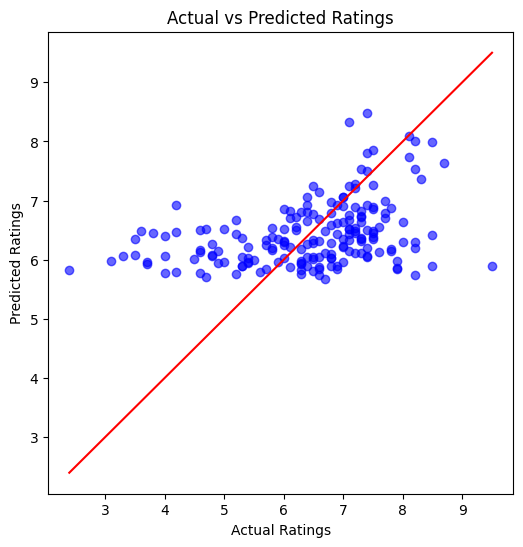

In [51]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


Conclusion:
The model predicts movie ratings with moderate accuracy. Further improvement can be achieved by adding NLP-based features from movie overviews or advanced models like Random Forest or Gradient Boosting.